In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV,\
RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, plot_confusion_matrix, accuracy_score, precision_score,\
    f1_score, recall_score, log_loss, plot_roc_curve



In [2]:
# Loading in the data
df = pd.read_csv("2022_LoL_esports_match_data_2022_07_25.csv")

/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Seeing a full list of the columns
column_list = list(df.columns)
column_list

['gameid',
 'datacompleteness',
 'url',
 'league',
 'year',
 'split',
 'playoffs',
 'date',
 'game',
 'patch',
 'participantid',
 'side',
 'position',
 'playername',
 'playerid',
 'teamname',
 'teamid',
 'champion',
 'ban1',
 'ban2',
 'ban3',
 'ban4',
 'ban5',
 'gamelength',
 'result',
 'kills',
 'deaths',
 'assists',
 'teamkills',
 'teamdeaths',
 'doublekills',
 'triplekills',
 'quadrakills',
 'pentakills',
 'firstblood',
 'firstbloodkill',
 'firstbloodassist',
 'firstbloodvictim',
 'team kpm',
 'ckpm',
 'firstdragon',
 'dragons',
 'opp_dragons',
 'elementaldrakes',
 'opp_elementaldrakes',
 'infernals',
 'mountains',
 'clouds',
 'oceans',
 'chemtechs',
 'hextechs',
 'dragons (type unknown)',
 'elders',
 'opp_elders',
 'firstherald',
 'heralds',
 'opp_heralds',
 'firstbaron',
 'barons',
 'opp_barons',
 'firsttower',
 'towers',
 'opp_towers',
 'firstmidtower',
 'firsttothreetowers',
 'turretplates',
 'opp_turretplates',
 'inhibitors',
 'opp_inhibitors',
 'damagetochampions',
 'dpm',
 'd

In [133]:
avg_game = df['gamelength'].mean()

In [134]:
#Average length of a game in minutes, because it can not be 31 hours...
avg_game/60

31.70043360131011

In [4]:
# Want to see how many unique teams there are
df['teamname'].value_counts()

Royal Never Give Up         648
T1                          624
Golden Guardians Academy    588
Top Esports                 576
100 Thieves Academy         552
                           ... 
V3 Esports Academy           12
mAAd City                    12
BT Excel                      6
Wulf Pack Cascade             6
Master Girl                   6
Name: teamname, Length: 506, dtype: int64

In [5]:
# Want to inspect the column 'datacompleteness', and see how many data points are incomplete
df['datacompleteness'].value_counts()

complete    91308
partial     16140
Name: datacompleteness, dtype: int64

In [6]:
# Have an initial outline of the df that I want to inspect.
games_at_15_df = df[['gameid',
 'datacompleteness',
 'url',
 'league',
 'year',
 'split',
'date',
 'game',
 'patch',
 'participantid',
'position',
'playername',
 'playerid',
 'teamname',
 'teamid',
 'champion',
'goldat15',
 'xpat15',
 'csat15',
 'opp_goldat15',
 'opp_xpat15',
 'opp_csat15',
 'golddiffat15',
 'xpdiffat15',
 'csdiffat15',
 'killsat15',
 'assistsat15',
 'deathsat15',
 'opp_killsat15',
 'opp_assistsat15',
 'opp_deathsat15',
'result']]

In [7]:
# Want to see how many missing values there are
games_at_15_df.isna().sum()

gameid                 24
datacompleteness       24
url                 90756
league                  0
year                    0
split               35748
date                    0
game                    0
patch                  24
participantid           0
position                0
playername          17912
playerid            18564
teamname                0
teamid                318
champion            17912
goldat15            16140
xpat15              16140
csat15              16140
opp_goldat15        16140
opp_xpat15          16140
opp_csat15          16140
golddiffat15        16140
xpdiffat15          16140
csdiffat15          16140
killsat15           16140
assistsat15         16140
deathsat15          16140
opp_killsat15       16140
opp_assistsat15     16140
opp_deathsat15      16140
result                  0
dtype: int64

In [8]:
# Want to inspect the rows that have 'partial' as their 'datacompleteness'
games_at_15_df.loc[games_at_15_df['datacompleteness'] == 'partial']

gameid datacompleteness  \
24      8401-8401_game_1          partial   
25      8401-8401_game_1          partial   
26      8401-8401_game_1          partial   
27      8401-8401_game_1          partial   
28      8401-8401_game_1          partial   
...                  ...              ...   
107143  9308-9308_game_2          partial   
107144  9308-9308_game_2          partial   
107145  9308-9308_game_2          partial   
107146  9308-9308_game_2          partial   
107147  9308-9308_game_2          partial   

                                                url league  year   split  \
24      https://lpl.qq.com/es/stats.shtml?bmid=8401    LPL  2022  Spring   
25      https://lpl.qq.com/es/stats.shtml?bmid=8401    LPL  2022  Spring   
26      https://lpl.qq.com/es/stats.shtml?bmid=8401    LPL  2022  Spring   
27      https://lpl.qq.com/es/stats.shtml?bmid=8401    LPL  2022  Spring   
28      https://lpl.qq.com/es/stats.shtml?bmid=8401    LPL  2022  Spring   
...                                             ...    ...   ...     ...   
107143  https://lpl.qq.com/es/stats.shtml?bmid=9308    LPL  2022  Summer   
107144  https://lpl.qq.com/es/stats.shtml?bmid=9308    LPL  2022  Summer   
107145  https://lpl.qq.com/es/stats.shtml?bmid=9308    LPL  2022  Summer   
107146  https://lpl.qq.com/es/stats.shtml?bmid=9308    LPL  2022  Summer   
107147  https://lpl.qq.com/es/stats.shtml?bmid=9308    LPL  2022  Summer   

                       date  game  patch  participantid  ... golddiffat15  \
24      2022-01-10 09:24:26     1  12.01              1  ...          NaN   
25      2022-01-10 09:24:26     1  12.01              2  ...          NaN   
26      2022-01-10 09:24:26     1  12.01              3  ...          NaN   
27      2022-01-10 09:24:26     1  12.01              4  ...          NaN   
28      2022-01-10 09:24:26     1  12.01              5  ...          NaN   
...                     ...   ...    ...            ...  ...          ...   
107143  2022-07-24 11:53:37     2  12.13              8  ...          NaN   
107144  2022-07-24 11:53:37     2  12.13              9  ...          NaN   
107145  2022-07-24 11:53:37     2  12.13             10  ...          NaN   
107146  2022-07-24 11:53:37     2  12.13            100  ...          NaN   
107147  2022-07-24 11:53:37     2  12.13            200  ...          NaN   

       xpdiffat15 csdiffat15 killsat15 assistsat15 deathsat15  opp_killsat15  \
24            NaN        NaN       NaN         NaN        NaN            NaN   
25            NaN        NaN       NaN         NaN        NaN            NaN   
26            NaN        NaN       NaN         NaN        NaN            NaN   
27            NaN        NaN       NaN         NaN        NaN            NaN   
28            NaN        NaN       NaN         NaN        NaN            NaN   
...           ...        ...       ...         ...        ...            ...   
107143        NaN        NaN       NaN         NaN        NaN            NaN   
107144        NaN        NaN       NaN         NaN        NaN            NaN   
107145        NaN        NaN       NaN         NaN        NaN            NaN   
107146        NaN        NaN       NaN         NaN        NaN            NaN   
107147        NaN        NaN       NaN         NaN        NaN            NaN   

        opp_assistsat15  opp_deathsat15  result  
24                  NaN             NaN       1  
25                  NaN             NaN       1  
26                  NaN             NaN       1  
27                  NaN             NaN       1  
28                  NaN             NaN       1  
...                 ...             ...     ...  
107143              NaN             NaN       1  
107144              NaN             NaN       1  
107145              NaN             NaN       1  
107146              NaN             NaN       0  
107147              NaN             NaN       1  

[16140 rows x 32 columns]

In [9]:
# Want to see how many total unique games are in this dataset
games_at_15_df['gameid'].value_counts()

ESPORTSTMNT01_2913839    12
ESPORTSTMNT03_2546195    12
NA1_4215039108           12
8829-8829_game_3         12
ESPORTSTMNT01_2780840    12
                         ..
ESPORTSTMNT06_2470564    12
9187-9187_game_2         12
ESPORTSTMNT02_2786748    12
ESPORTSTMNT06_2290654    12
ESPORTSTMNT03_2786031    12
Name: gameid, Length: 8954, dtype: int64

In [10]:
# Only want to use 'datacompleteness' that is 'complete'
cleaned_games_at_15_df = games_at_15_df.loc[games_at_15_df['datacompleteness'] == 'complete']

In [11]:
# Want to see how many games it removed once the 'partial' 
cleaned_games_at_15_df['gameid'].value_counts()

ESPORTSTMNT01_2913839    12
ESPORTSTMNT01_2701997    12
ESPORTSTMNT04_2410894    12
ESPORTSTMNT02_2557229    12
NA1_4170946192           12
                         ..
ESPORTSTMNT01_2966657    12
ESPORTSTMNT04_2240169    12
ESPORTSTMNT03_2638244    12
ESPORTSTMNT03_2790980    12
ESPORTSTMNT03_2786031    12
Name: gameid, Length: 7609, dtype: int64

# First Trial of Sifting through Data

- Seems like all my 'datacompleteness' that's marked as 'partial' does not have any of the information on the game at the 15 minute mark, so I will drop all of those rows. This is roughly around 10% of the dataset, but since there are over 100,000 observations this will be ok.


- Without cleaning, there are 8954 unique games being analyzed. Post cleaning there are 7609 unique games to draw conclusions from.


- Going to drop the 'url', 'datacompleteness', 'teamid', 'participantid', 'year', 'split', 'date' column as they don't add any information. I will also drop 'game', because it denotes which game it is in a series, but is not relevant for this problem.


- Since the objective is to predict whether a team will win or not based on information 15 minutes into the game, I'm going to drop 'Champion', 'position', 'playername', 'playerid' even though I think that they would be incredibly important factors if I were trying to predict the individual effect a person had on a team.


In [12]:
cleaned_games_at_15_df['game']

0         1
1         1
2         1
3         1
4         1
         ..
107467    1
107468    1
107469    1
107470    1
107471    1
Name: game, Length: 91308, dtype: int64

In [13]:
cleaned_games_at_15_df.columns

Index(['gameid', 'datacompleteness', 'url', 'league', 'year', 'split', 'date',
       'game', 'patch', 'participantid', 'position', 'playername', 'playerid',
       'teamname', 'teamid', 'champion', 'goldat15', 'xpat15', 'csat15',
       'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15',
       'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15',
       'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15', 'result'],
      dtype='object')

In [14]:
cleaned_games_at_15_df = cleaned_games_at_15_df.drop(columns=['url',
                                                              'datacompleteness',
                                                              'year',
                                                              'split',
                                                              'date',
                                                              'game',
                                                              'patch',
                                                              'teamid',
                                                              'participantid',
                                                              'champion',
                                                              'position',
                                                              'playername',
                                                              'playerid'])

In [15]:
# Testing to see that it only outputs a team with the result and not all the individuals
test_top_10 = cleaned_games_at_15_df.head(12)
test_top_10.groupby(['teamname','gameid','result','league']).sum().reset_index()

teamname                 gameid  result  league  \
0       Fredit BRION Challengers  ESPORTSTMNT01_2690210       0  LCK CL   
1  Nongshim RedForce Challengers  ESPORTSTMNT01_2690210       1  LCK CL   

   goldat15   xpat15  csat15  opp_goldat15  opp_xpat15  opp_csat15  \
0   49612.0  56002.0   974.0       49398.0     59236.0      1020.0   
1   49398.0  59236.0  1020.0       49612.0     56002.0       974.0   

   golddiffat15  xpdiffat15  csdiffat15  killsat15  assistsat15  deathsat15  \
0         214.0     -3234.0       -46.0       10.0         20.0        12.0   
1        -214.0      3234.0        46.0       12.0         36.0        10.0   

   opp_killsat15  opp_assistsat15  opp_deathsat15  
0           12.0             36.0            10.0  
1           10.0             20.0            12.0

In [16]:
# Changing the whole dataframe, so that every data point is a single game result for each team
cleaned_games_at_15_df = cleaned_games_at_15_df.groupby(['teamname','gameid','result','league']).sum().reset_index()
cleaned_games_at_15_df

teamname                 gameid  result league  \
0                    100 Thieves  ESPORTSTMNT01_2691713       1    LCS   
1                    100 Thieves  ESPORTSTMNT01_2695415       1    LCS   
2                    100 Thieves  ESPORTSTMNT01_2695850       0    LCS   
3                    100 Thieves  ESPORTSTMNT01_2701905       1    LCS   
4                    100 Thieves  ESPORTSTMNT01_2702518       0    LCS   
...                          ...                    ...     ...    ...   
15213  İstanbul Wildcats Academy  ESPORTSTMNT06_2420139       1    TRA   
15214  İstanbul Wildcats Academy  ESPORTSTMNT06_2460436       1    TRA   
15215  İstanbul Wildcats Academy  ESPORTSTMNT06_2470519       1    TRA   
15216  İstanbul Wildcats Academy  ESPORTSTMNT06_2530075       0    TRA   
15217  İstanbul Wildcats Academy  ESPORTSTMNT06_2540230       1    TRA   

       goldat15   xpat15  csat15  opp_goldat15  opp_xpat15  opp_csat15  \
0       54656.0  61980.0  1090.0       45614.0     58046.0      1046.0   
1       51972.0  60460.0  1074.0       46182.0     60070.0      1046.0   
2       49088.0  60236.0  1042.0       48226.0     61184.0       998.0   
3       57412.0  62318.0  1058.0       47482.0     58604.0       942.0   
4       46024.0  60188.0  1112.0       46612.0     57482.0      1058.0   
...         ...      ...     ...           ...         ...         ...   
15213   49102.0  59828.0  1094.0       48852.0     60164.0      1030.0   
15214   45638.0  59580.0  1038.0       50276.0     60272.0      1064.0   
15215   51820.0  60134.0  1048.0       47314.0     58654.0      1010.0   
15216   46296.0  55432.0   988.0       48384.0     60188.0      1038.0   
15217   52690.0  57404.0   900.0       59200.0     58944.0       952.0   

       golddiffat15  xpdiffat15  csdiffat15  killsat15  assistsat15  \
0            9042.0      3934.0        44.0        8.0          8.0   
1            5790.0       390.0        28.0        6.0         10.0   
2             862.0      -948.0        44.0        6.0          8.0   
3            9930.0      3714.0       116.0       16.0         24.0   
4            -588.0      2706.0        54.0        0.0          0.0   
...             ...         ...         ...        ...          ...   
15213         250.0      -336.0        64.0        2.0          0.0   
15214       -4638.0      -692.0       -26.0        0.0          0.0   
15215        4506.0      1480.0        38.0       12.0         20.0   
15216       -2088.0     -4756.0       -50.0        4.0         10.0   
15217       -6510.0     -1540.0       -52.0       18.0         32.0   

       deathsat15  opp_killsat15  opp_assistsat15  opp_deathsat15  
0             2.0            2.0              8.0             8.0  
1             4.0            4.0              8.0             6.0  
2             6.0            6.0              6.0             6.0  
3            12.0           12.0             12.0            16.0  
4             2.0            2.0              4.0             0.0  
...           ...            ...              ...             ...  
15213         4.0            4.0              6.0             2.0  
15214         6.0            6.0             10.0             0.0  
15215         6.0            6.0             12.0            12.0  
15216         6.0            6.0              8.0             4.0  
15217        20.0           20.0             38.0            18.0  

[15218 rows x 19 columns]

# Post data cleaning and organization

- Going to drop 'teamname' and would only add it back in via OHE as a follow up to this model. Would be interesting to see if ceratin teams transcend the statistics. For now, just want to run tests on just the statistics at 15 minutes.


- Going to drop 'league' as well. Guessing that some leagues will be a lot better than others, but that can be added back in via OHE for a follow up of this model.


- Since I was able to group each 'gameid' (which is an individual game) by team now I can drop gameid.

In [17]:
# Want to understand how many unique teams and leagues there are before getting rid of the cols.

print(cleaned_games_at_15_df['league'].nunique())
print(cleaned_games_at_15_df['teamname'].nunique())

41
466


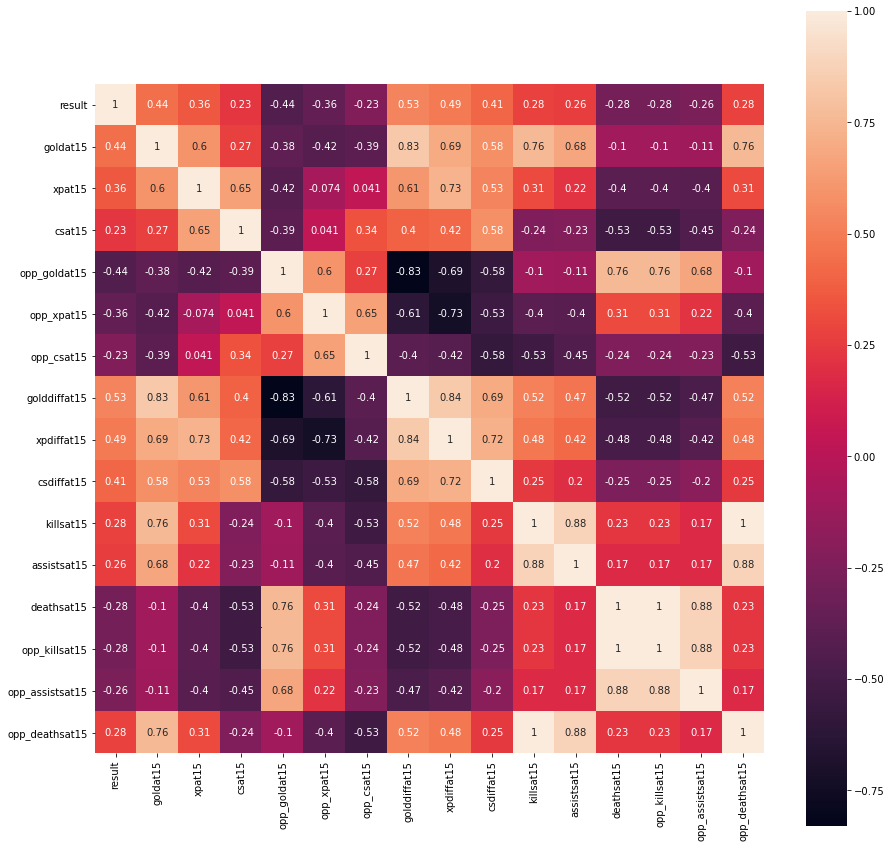

In [18]:
# Just investigating the correlation between variables.
fig = plt.subplots(figsize=(15,15))
ax = sns.heatmap(cleaned_games_at_15_df.corr(),annot=True, square=True);

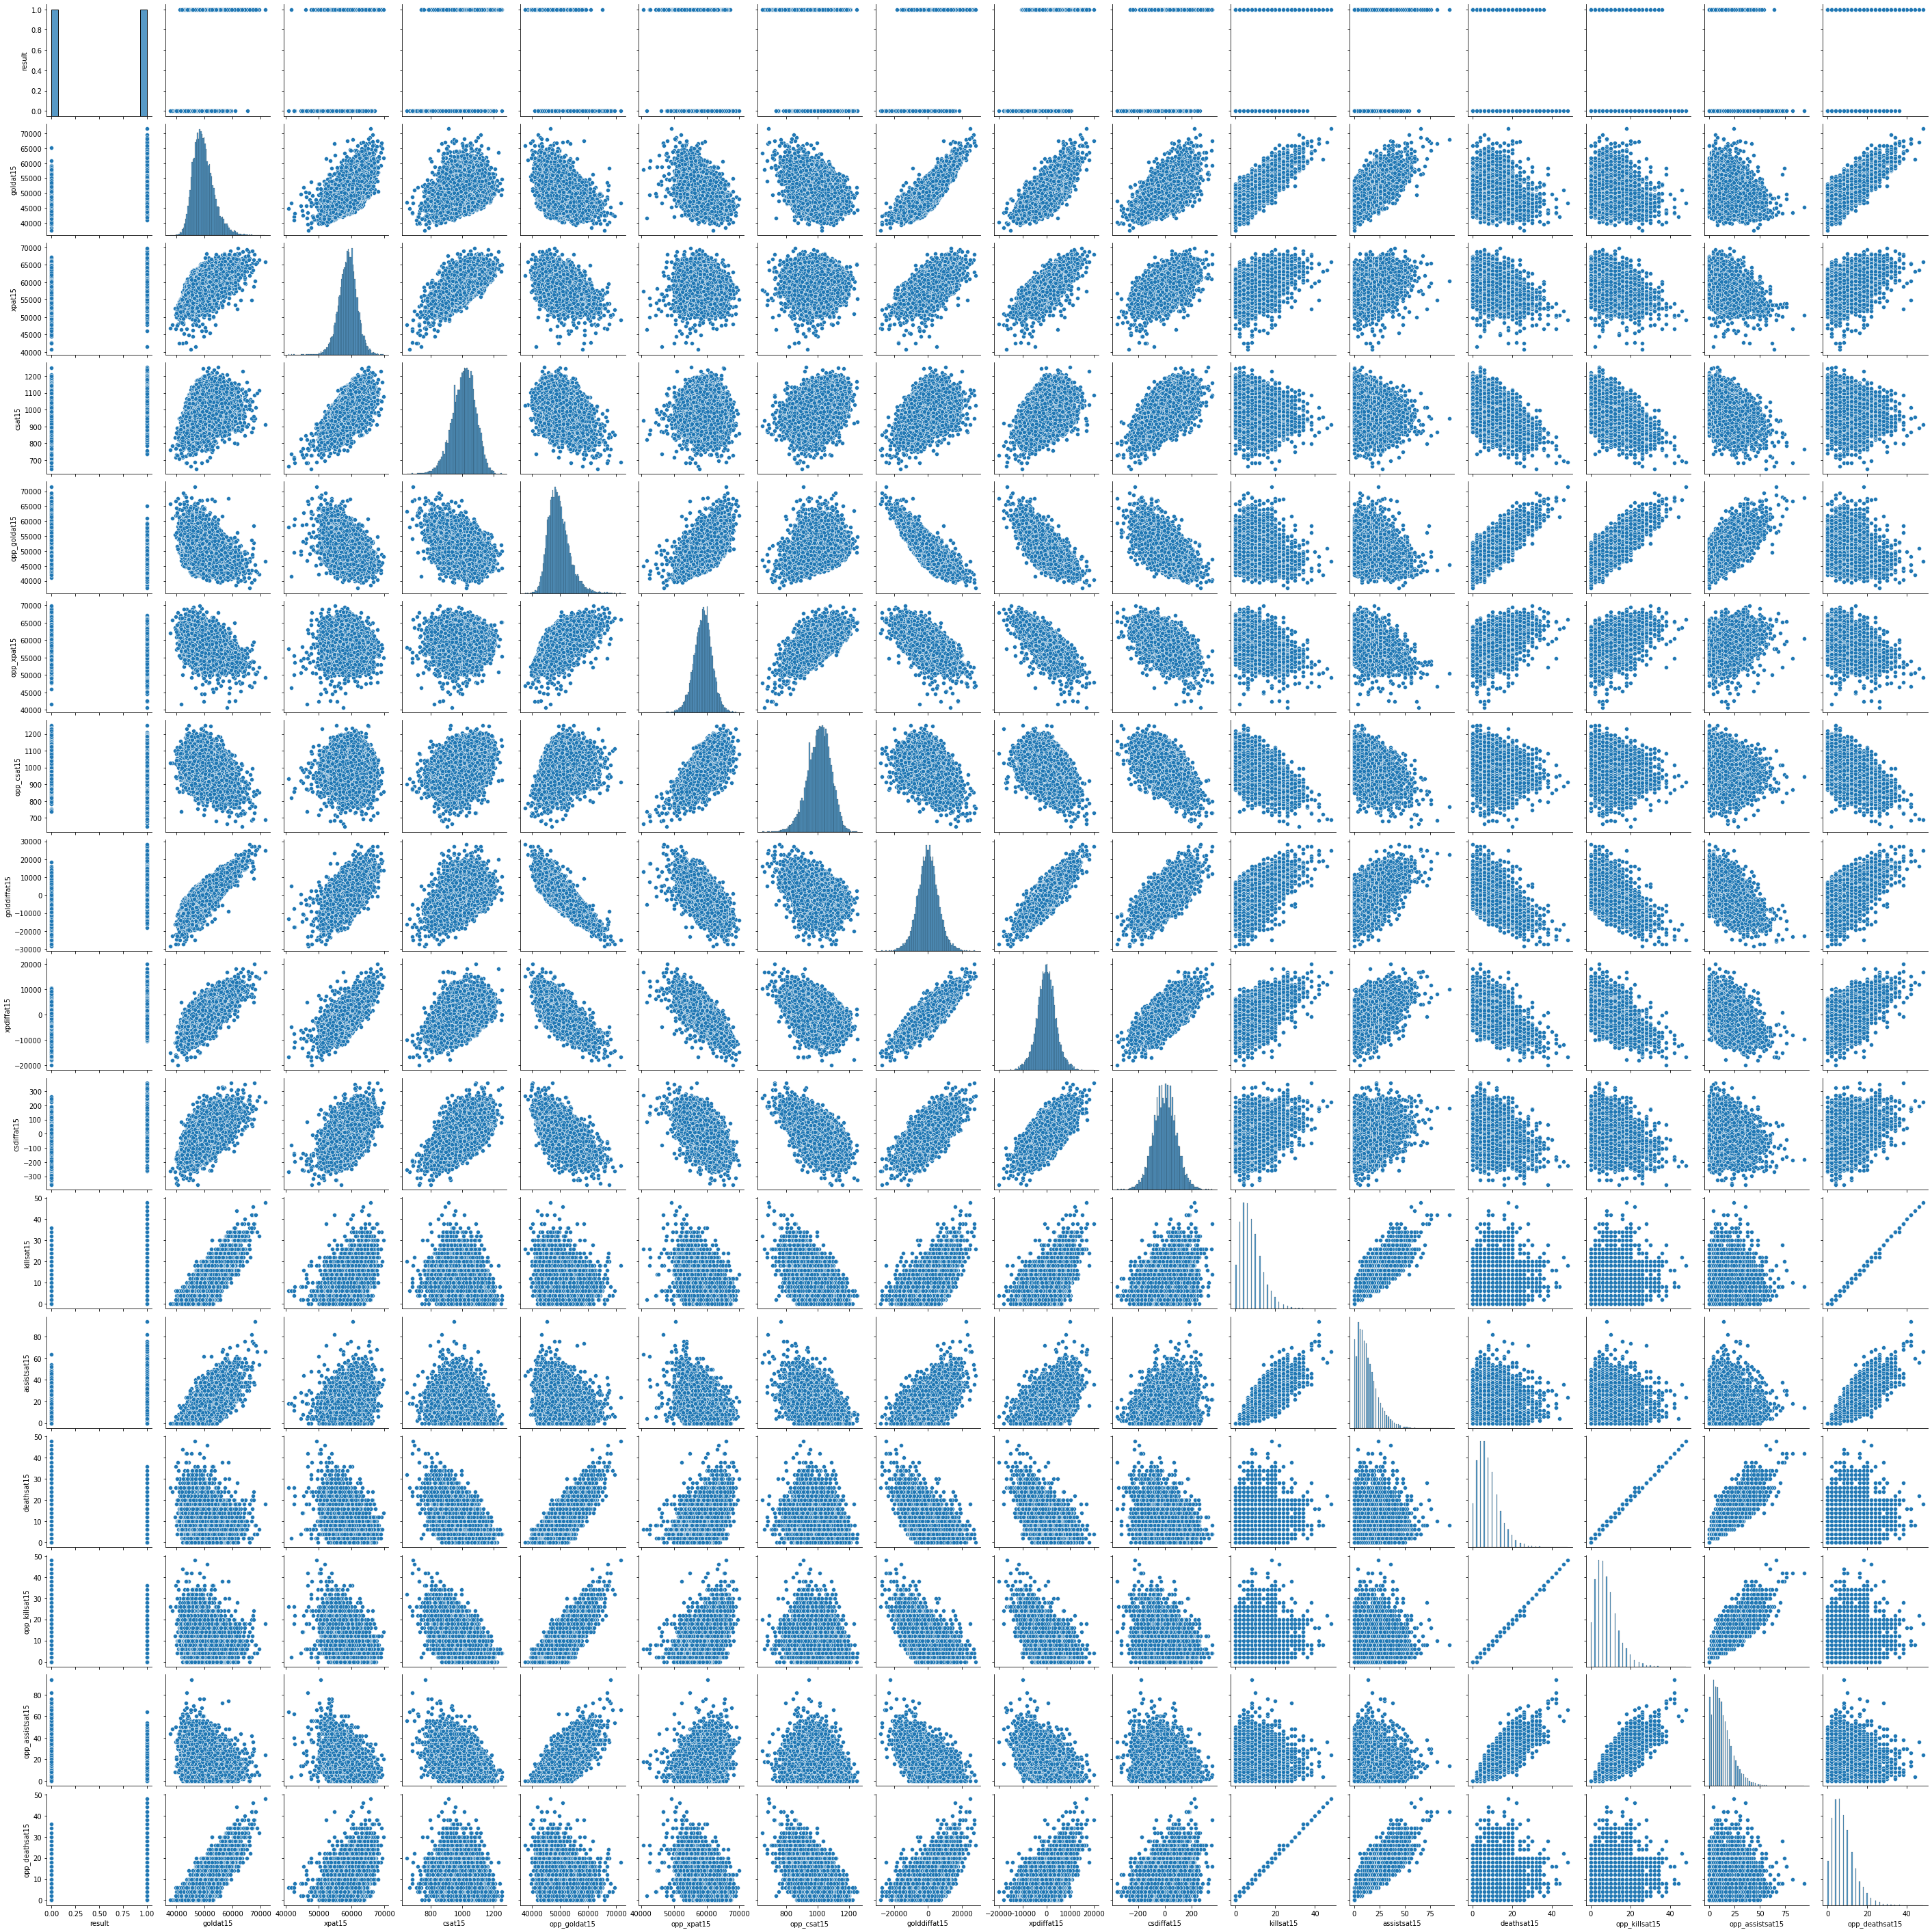

In [19]:
# Continuing the investigation of how the features relate to each other via graphs
sns.pairplot(cleaned_games_at_15_df);

In [20]:
# Want to see basic statistics per team before getting rid of the column
cleaned_games_at_15_df.groupby('teamname').median()

result  goldat15   xpat15  csat15  opp_goldat15  \
teamname                                                                     
100 Thieves                   1.0   49055.0  60363.0  1064.0       48296.0   
100 Thieves Academy           1.0   50741.0  60369.0  1032.0       49857.0   
100 Thieves Next              1.0   52006.0  60176.0  1016.0       47838.0   
300                           0.0   46672.0  57480.0   934.0       48053.0   
5 Ronin                       0.0   48556.0  58078.0  1015.0       50164.0   
...                           ...       ...      ...     ...           ...   
paiN Gaming                   1.0   50498.0  59228.0  1038.0       48330.0   
paiN Gaming Academy           1.0   49718.0  59356.0  1002.0       47878.0   
unknown team                  1.0   49062.0  58910.0   976.0       49144.0   
İstanbul Wildcats             1.0   49011.0  57977.0   980.0       48307.0   
İstanbul Wildcats Academy     1.0   48286.0  58231.0  1017.0       48672.0   

                           opp_xpat15  opp_csat15  golddiffat15  xpdiffat15  \
teamname                                                                      
100 Thieves                   60029.0      1065.0         502.0       368.0   
100 Thieves Academy           59578.0      1026.0         819.0       677.0   
100 Thieves Next              58230.0       958.0        3608.0      1630.0   
300                           57619.0       946.0       -2707.0       315.0   
5 Ronin                       59482.0      1024.0       -1394.0      -867.0   
...                               ...         ...           ...         ...   
paiN Gaming                   58288.0      1026.0        2392.0       800.0   
paiN Gaming Academy           58140.0       984.0        1978.0      1088.0   
unknown team                  57950.0       944.0         334.0       570.0   
İstanbul Wildcats             57933.0      1020.0        -420.0       -67.0   
İstanbul Wildcats Academy     58554.0      1013.0        -988.0      -522.0   

                           csdiffat15  killsat15  assistsat15  deathsat15  \
teamname                                                                    
100 Thieves                      -5.0        5.0          8.0         4.0   
100 Thieves Academy               7.0        8.0         12.0         6.0   
100 Thieves Next                 60.0       10.0         14.0         8.0   
300                             -22.0        8.0         13.0         8.0   
5 Ronin                         -24.0        6.0         10.0         8.0   
...                               ...        ...          ...         ...   
paiN Gaming                      14.0        8.0         12.0         6.0   
paiN Gaming Academy              26.0        6.0         12.0         6.0   
unknown team                     20.0       10.0         12.0        10.0   
İstanbul Wildcats               -27.0        6.0         10.0         6.0   
İstanbul Wildcats Academy       -16.0        6.0          9.0         6.0   

                           opp_killsat15  opp_assistsat15  opp_deathsat15  
teamname                                                                   
100 Thieves                          4.0              6.0             5.0  
100 Thieves Academy                  6.0             10.0             8.0  
100 Thieves Next                     8.0             12.0            10.0  
300                                  8.0             12.0             8.0  
5 Ronin                              8.0             12.0             6.0  
...                                  ...              ...             ...  
paiN Gaming                          6.0              8.0             8.0  
paiN Gaming Academy                  6.0             12.0             6.0  
unknown team                        10.0             14.0            10.0  
İstanbul Wildcats                    6.0             10.0             6.0  
İstanbul Wildcats Academy            6.0             10.0             

In [21]:
# Want to understand the average statistics of a winning team at 15 minutes
cleaned_games_at_15_df.groupby('result').mean()

goldat15        xpat15       csat15  opp_goldat15    opp_xpat15  \
result                                                                        
0       47898.360363  57882.192929   993.027205  51256.172427  59909.369694   
1       51256.172427  59909.369694  1027.799974  47898.360363  57882.192929   

         opp_csat15  golddiffat15   xpdiffat15  csdiffat15  killsat15  \
result                                                                  
0       1027.799974  -3357.812065 -2027.176764  -34.772769   6.302536   
1        993.027205   3357.812065  2027.176764   34.772769   9.548955   

        assistsat15  deathsat15  opp_killsat15  opp_assistsat15  \
result                                                            
0         10.111184    9.569194       9.548955        15.407544   
1         15.407544    6.319096       6.302536        10.111184   

        opp_deathsat15  
result                  
0             6.319096  
1             9.569194

In [22]:
# Sanity check that there's no unbalance in the target.
cleaned_games_at_15_df['result'].value_counts()

1    7609
0    7609
Name: result, dtype: int64

In [23]:
# Dropping 'teamname','gameid','league'
no_lge_team_gms_at_15_df = cleaned_games_at_15_df.drop(columns=['teamname','gameid','league'])
no_lge_team_gms_at_15_df

result  goldat15   xpat15  csat15  opp_goldat15  opp_xpat15  \
0           1   54656.0  61980.0  1090.0       45614.0     58046.0   
1           1   51972.0  60460.0  1074.0       46182.0     60070.0   
2           0   49088.0  60236.0  1042.0       48226.0     61184.0   
3           1   57412.0  62318.0  1058.0       47482.0     58604.0   
4           0   46024.0  60188.0  1112.0       46612.0     57482.0   
...       ...       ...      ...     ...           ...         ...   
15213       1   49102.0  59828.0  1094.0       48852.0     60164.0   
15214       1   45638.0  59580.0  1038.0       50276.0     60272.0   
15215       1   51820.0  60134.0  1048.0       47314.0     58654.0   
15216       0   46296.0  55432.0   988.0       48384.0     60188.0   
15217       1   52690.0  57404.0   900.0       59200.0     58944.0   

       opp_csat15  golddiffat15  xpdiffat15  csdiffat15  killsat15  \
0          1046.0        9042.0      3934.0        44.0        8.0   
1          1046.0        5790.0       390.0        28.0        6.0   
2           998.0         862.0      -948.0        44.0        6.0   
3           942.0        9930.0      3714.0       116.0       16.0   
4          1058.0        -588.0      2706.0        54.0        0.0   
...           ...           ...         ...         ...        ...   
15213      1030.0         250.0      -336.0        64.0        2.0   
15214      1064.0       -4638.0      -692.0       -26.0        0.0   
15215      1010.0        4506.0      1480.0        38.0       12.0   
15216      1038.0       -2088.0     -4756.0       -50.0        4.0   
15217       952.0       -6510.0     -1540.0       -52.0       18.0   

       assistsat15  deathsat15  opp_killsat15  opp_assistsat15  opp_deathsat15  
0              8.0         2.0            2.0              8.0             8.0  
1             10.0         4.0            4.0              8.0             6.0  
2              8.0         6.0            6.0              6.0             6.0  
3             24.0        12.0           12.0             12.0            16.0  
4              0.0         2.0            2.0              4.0             0.0  
...            ...         ...            ...              ...             ...  
15213          0.0         4.0            4.0              6.0             2.0  
15214          0.0         6.0            6.0             10.0             0.0  
15215         20.0         6.0            6.0             12.0            12.0  
15216         10.0         6.0            6.0              8.0             4.0  
15217         32.0        20.0           20.0             38.0            18.0  

[15218 rows x 16 columns]

# Splitting the data

- First have to set the features as one dataframe, ie X.
- Second have to set the results as its own dataframe, ie y.
- Third must split into Train and Test.


# Transforming the dataframe via Pipeline

- Now that I have the divided dataframes that I want to test on I'm going to fit and transform the data via Pipeline.
- Since all my columns are numeric, I will not have to worry about categorical/OHE transformation.

In [24]:
# Starting with a simple Logistic Regression, establishing X and y
# Target will be the result column, and all the stats at 15 minutes will be the features trying to determine the result.
# Random state = 99, for reproducability

X = no_lge_team_gms_at_15_df.drop(columns='result')
y = no_lge_team_gms_at_15_df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 99)

In [25]:
X_train_nums = X_train.select_dtypes('float64')
X_train_nums.columns

Index(['goldat15', 'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15',
       'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15',
       'opp_deathsat15'],
      dtype='object')

In [26]:
numerical_pipeline = Pipeline(steps=[
    ('ss', StandardScaler())
])

ct = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_train_nums.columns)
])

In [27]:
logreg_model_pipe = Pipeline(steps=[
    ('ct',ct),
    ('logreg',LogisticRegression(random_state=99))
])

In [28]:
logreg_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['goldat15', 'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15',
       'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15',
       'opp_deathsat15'],
      dtype='object'))])),
                ('logreg', LogisticRegression(random_state=99))])

In [419]:
logreg_model_pipe.score(X_train,y_train)

0.7467799877332866

# First Model, Logistic Regression

- Will create a baseline dummy model that only picks everything as a win, meaning 'result' is 1.

- Then will iterate and see if an untuned/unbiased model can predict better than the baseline dummy model.

In [29]:
# Creating a dummy model
dummy_LoL_model = DummyClassifier(strategy="most_frequent")
dummy_LoL_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [30]:
# Seeing and confirming what the dummy model is predicting.
dummy_LoL_model.predict(X_train)[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
y_pred_dummy_train = dummy_LoL_model.predict(X_train)
y_pred_proba_dummy_train = dummy_LoL_model.predict_proba(X_train)

In [32]:
# Fitting the training data
logreg_model_pipe.fit(X_train, y_train)

# Seeing how well the training data can predict.
y_pred_train = logreg_model_pipe.predict(X_train)
y_pred_proba_train = logreg_model_pipe.predict_proba(X_train)

# Comparing the log loss of the dummy model compared to the baseline logreg model.
print(f"Log Loss Dummy: {log_loss(y_train, y_pred_proba_dummy_train)}") # Lower log_loss than a model that only guesses right 50%
print(f"Log Loss Baseline Logreg: {log_loss(y_train, y_pred_proba_train)}")

Log Loss Dummy: 17.240638668343657
Log Loss Baseline Logreg: 0.5123808285377147


In [33]:
"""
This is an accuracy score. Not great, but let's keep going.

In betting terms a 74% accuracy would be absolutely fantastic. This is a comment to portray
that the standard for the field of betting is that anything above a 50% is considered good.
"""

print(f"Dummy Accuracy: {dummy_LoL_model.score(X_train, y_train)}")
print(f"Baseline Logreg Accuracy: {logreg_model_pipe.score(X_train, y_train)}")
print()
print(f"Dummy F1:{f1_score(y_train, y_pred_dummy_train)}")
print(f"Baseline Logreg F1:{f1_score(y_train, y_pred_train)}")

Dummy Accuracy: 0.5008323841233681
Baseline Logreg Accuracy: 0.7467799877332866

Dummy F1:0.6674061533072566
Baseline Logreg F1:0.7471123556177809


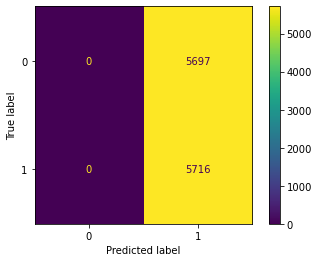

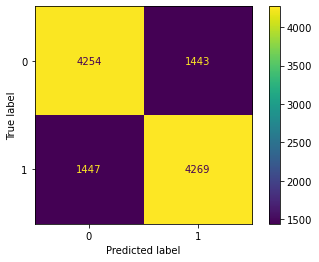

In [35]:
# Visualizing the baseline logreg as a Confusion Matrix and comparing it to the Dummy model

plot_confusion_matrix(dummy_LoL_model, X_train, y_train)
plot_confusion_matrix(logreg_model_pipe,X_train,y_train);

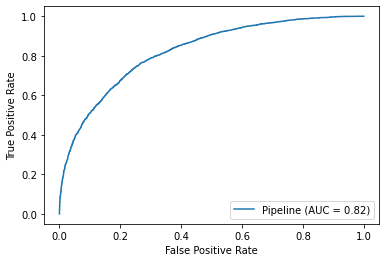

In [36]:
# Visualizing the AUC, via a ROC curve.
# Given a win or a loss there is a 82% chance to correctly classify on the training.
plot_roc_curve(logreg_model_pipe, X_train, y_train);

In [40]:
# Onto grid searching and seeing if we can improve the simple Logistic Regression model.
#Preparing the grid for the logreg
grid_Logreg_LoL = {'penalty':['l1','l2','elasticnet',None],
                  'C':[1e-1, 1e2, 1e4, 1e6],
                  'max_iter': [1e3],
                  'solver':['sag','saga'],
                  'random_state':[99]}

In [50]:
# Instatiating the GridSearchCV and inputting all the necessary parameters.
gs_Logreg_LoL = GridSearchCV(estimator=logreg_model_pipe['logreg'], param_grid=grid_Logreg_LoL, cv=5,verbose=3)

In [51]:
# Fitting it and seeing the individual scores.
gs_Logreg_LoL.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=sag .
[CV]  C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=sag .
[CV]  C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=sag .
[CV]  C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=sag .
[CV]  C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=sag .
[CV]  C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=saga 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Sol

[CV]  C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.745, total=   1.8s
[CV] C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.740, total=   1.9s
[CV] C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.745, total=   2.0s
[CV] C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.754, total=   1.9s
[CV] C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.741, total=   1.9s
[CV] C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=sag .


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.744, total=   1.5s
[CV] C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=sag .


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.738, total=   1.5s
[CV] C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=sag .


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.745, total=   1.6s
[CV] C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=sag .


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.754, total=   1.5s
[CV] C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=sag .


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.742, total=   1.6s
[CV] C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.745, total=   1.5s
[CV] C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.740, total=   1.5s
[CV] C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.745, total=   1.5s
[CV] C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.754, total=   1.6s
[CV] C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8

[CV]  C=0.1, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.741, total=   1.5s
[CV] C=0.1, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=0.1, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=0.1, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=0.1, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=0.1, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=0.1, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag, score=nan, total

/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.745, total=   1.8s
[CV] C=100.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.740, total=   2.0s
[CV] C=100.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.745, total=   2.0s
[CV] C=100.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.754, total=   2.0s
[CV] C=100.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.741, total=   1.9s
[CV] C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.744, total=   1.5s
[CV] C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.738, total=   1.7s
[CV] C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.745, total=   1.6s
[CV] C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.754, total=   1.6s
[CV] C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.742, total=   1.4s
[CV] C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.745, total=   1.5s
[CV] C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.740, total=   1.5s
[CV] C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.745, total=   1.5s
[CV] C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.754, total=   1.5s
[CV] C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8

[CV]  C=100.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.741, total=   1.5s
[CV] C=100.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=100.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=100.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=100.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=100.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=100.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=100.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=100.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=100.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=100.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver

/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10000.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.745, total=   1.8s
[CV] C=10000.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10000.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.740, total=   1.7s
[CV] C=10000.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10000.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.745, total=   1.8s
[CV] C=10000.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10000.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.754, total=   1.8s
[CV] C=10000.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10000.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.741, total=   1.8s
[CV] C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.744, total=   1.4s
[CV] C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.738, total=   1.4s
[CV] C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.745, total=   1.4s
[CV] C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.754, total=   1.4s
[CV] C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.742, total=   1.4s
[CV] C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.745, total=   1.5s
[CV] C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.740, total=   1.5s
[CV] C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.745, total=   1.5s
[CV] C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.754, total=   1.5s
[CV] C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8

[CV]  C=10000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.741, total=   1.5s
[CV] C=10000.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=10000.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=10000.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=10000.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=10000.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=10000.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=10000.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=10000.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=10000.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=10000.0, max_iter=1000.0, penalty=elasticnet, r

/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000000.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.745, total=   1.7s
[CV] C=1000000.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000000.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.740, total=   1.7s
[CV] C=1000000.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000000.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.745, total=   1.7s
[CV] C=1000000.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000000.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.754, total=   1.8s
[CV] C=1000000.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000000.0, max_iter=1000.0, penalty=l1, random_state=99, solver=saga, score=0.741, total=   1.7s
[CV] C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.744, total=   1.4s
[CV] C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.738, total=   1.4s
[CV] C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.745, total=   1.4s
[CV] C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.754, total=   1.4s
[CV] C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=sag, score=0.742, total=   1.4s
[CV] C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.745, total=   1.4s
[CV] C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.740, total=   1.5s
[CV] C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.745, total=   1.4s
[CV] C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.754, total=   1.4s
[CV] C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga 


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8

[CV]  C=1000000.0, max_iter=1000.0, penalty=l2, random_state=99, solver=saga, score=0.741, total=   1.5s
[CV] C=1000000.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=1000000.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=1000000.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=1000000.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=1000000.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=1000000.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=1000000.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=1000000.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag, score=nan, total=   0.0s
[CV] C=1000000.0, max_iter=1000.0, penalty=elasticnet, random_state=99, solver=sag 
[CV]  C=1000000.0, max_iter=1000.0,

/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=99),
             param_grid={'C': [0.1, 100.0, 10000.0, 1000000.0],
                         'max_iter': [1000.0],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': [99], 'solver': ['sag', 'saga']},
             verbose=3)

In [52]:
# Returning the best parameters
gs_Logreg_LoL.best_params_

{'C': 0.1,
 'max_iter': 1000.0,
 'penalty': 'l1',
 'random_state': 99,
 'solver': 'saga'}

In [53]:
# Returning the best score, which is not better than the baseline model.
# It's actually ever so slightly worse...
gs_Logreg_LoL.best_score_

0.7448528409695102

In [54]:
# Saving down the best model from the grid search
gs_best_Logreg_LoL_model = gs_Logreg_LoL.best_estimator_

In [55]:
for fi, feauture in zip(gs_best_Logreg_LoL_model.coef_[0], X_train.columns):
    print(fi, feauture)

6.736560395877903e-05 goldat15
3.4229574550546544e-05 xpat15
0.0002604253415755623 csat15
-6.460347738407157e-05 opp_goldat15
-3.751980745730109e-05 opp_xpat15
-0.0002032222682931328 opp_csat15
0.00013325662386539088 golddiffat15
7.303692378252172e-05 xpdiffat15
0.000464935151862114 csdiffat15
1.2614977165485378e-05 killsat15
3.567875084941819e-05 assistsat15
-3.2370764425883844e-06 deathsat15
-2.460944269619646e-06 opp_killsat15
-2.2163283830221107e-05 opp_assistsat15
1.3244125027297848e-05 opp_deathsat15


# Evaluating the model with cross-validation


In [56]:
cv_results_logreg_baseline = cross_validate(estimator=gs_best_Logreg_LoL_model,
                                    X = X_train,
                                    y=y_train,
                                    cv=5,
                                    return_train_score=True)

/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/v

In [57]:
#Comparing the Cross Validate scores to the training score. Very in line.
print(cv_results_logreg_baseline['test_score'])
print(gs_best_Logreg_LoL_model.score(X_train, y_train))

[0.74463425 0.73981603 0.74463425 0.75416301 0.74101665]
0.7451152194865505


In [58]:
# Comparing the cross val log loss with the training score, to see if under or over fit.
# They're pretty identical.

logreg_LoL_neg_log_loss = cross_val_score(gs_best_Logreg_LoL_model, X_train, y_train, scoring='neg_log_loss')
logreg_LoL_log_loss = -(logreg_LoL_neg_log_loss.mean())
print(logreg_LoL_log_loss)
print(log_loss(y_train, y_pred_proba_train))

/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.5132601382818793
0.5123808285377147


/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


# Second Model: Decision Tree

- Want to see what feature is considered the most important to split on.

- First model will be a dummy baseline, unpruned

- Models to follow will have various tuned hyperparameters to prune the decision tree and try to have a better score than the Logistic Regression Model.
    - Grid Search to tune.

In [59]:
# Decision Tree to see what feature is the most decisive for splits

tree_model_pipe = Pipeline(steps=[
    ('ct',ct),
    ('tree',DecisionTreeClassifier(random_state=99))
])


tree_model_pipe.fit(X_train, y_train)

print(tree_model_pipe.score(X_train,y_train))

1.0


In [61]:
# Seeing how deep the decision tree goes.
tree_model_pipe['tree'].get_depth()

30

In [62]:
# Want to compare the training scores vs the testing scores. Since the tree is unpruned,
# it should perform fairly bad on the testing data.
tree_cv = cross_validate(tree_model_pipe, X_train, y_train, return_train_score=True)
print(f"Training Score:{tree_cv['train_score']}")
print(f"Test Score:{tree_cv['test_score']}")

Training Score:[1. 1. 1. 1. 1.]
Test Score:[0.66141042 0.63162505 0.6587823  0.65293602 0.6520596 ]


In [63]:
# Want to see how the feature importance is distributed on the unpruned tree
tree_model_pipe['tree'].feature_importances_

array([0.05362153, 0.07048863, 0.05310197, 0.05917456, 0.06615238,
       0.0534596 , 0.36904484, 0.07455393, 0.06744078, 0.01549909,
       0.03551633, 0.01640257, 0.01221904, 0.03969274, 0.01363202])

In [66]:
# Putting a name to the order of the feature importances
for fi, feauture in zip(tree_model_pipe['tree'].feature_importances_, X_train.columns):
    print(fi, feauture)

0.053621528291396915 goldat15
0.07048862697284222 xpat15
0.053101972063693124 csat15
0.059174564779065256 opp_goldat15
0.06615237512130326 opp_xpat15
0.05345959644363255 opp_csat15
0.3690448410379813 golddiffat15
0.07455392839253057 xpdiffat15
0.06744078144641413 csdiffat15
0.01549908923799259 killsat15
0.03551632633228992 assistsat15
0.016402573386544876 deathsat15
0.012219036450197207 opp_killsat15
0.03969274472784219 opp_assistsat15
0.013632015316273845 opp_deathsat15


In [67]:
# Onto gridsearch/tuning the decision tree model

grid_tree_LoL = {'criterion':['gini','entropy'],
                 'max_features': [None,'auto'],
                 'min_samples_split':[2,3,4],
                 'max_depth':[5,10,15,20,25,30],
       'min_samples_leaf':[0.01,0.025,0.05,0.075,0.1]}

In [68]:
gs_LoL = GridSearchCV(estimator=tree_model_pipe['tree'], param_grid=grid_tree_LoL, cv=5, verbose=3)

In [69]:
gs_LoL.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.742, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.736, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.733, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.739, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.01, min_samples_split=3, score=0.742, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.01, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.01, min_samples_split=3, score=0.736, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.01, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.01, min_samples_split=3, score=0.733, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.01, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.01, min_samples_split=3, score=0.739, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.01, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.01, min_samples_split=3, score=0.724, t

[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.05, min_samples_split=4, score=0.752, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.05, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.05, min_samples_split=4, score=0.742, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.075, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.075, min_samples_split=2, score=0.736, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.075, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.075, min_samples_split=2, score=0.732, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.075, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_features=None, min_samples_leaf=0.075, min_samples_split=2, score=0.

[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.025, min_samples_split=3, score=0.720, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.025, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.025, min_samples_split=3, score=0.722, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.025, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.025, min_samples_split=3, score=0.730, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.025, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.025, min_samples_split=4, score=0.717, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.025, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=0.025, min_samples_split=4, score

[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.738, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.728, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.726, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.737, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score

[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=0.05, min_samples_split=4, score=0.752, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=0.05, min_samples_split=4 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=0.05, min_samples_split=4, score=0.742, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=0.075, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=0.075, min_samples_split=2, score=0.736, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=0.075, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=0.075, min_samples_split=2, score=0.732, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=0.075, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=0.075, min_samples_split=2,

[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.025, min_samples_split=2, score=0.713, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.025, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.025, min_samples_split=3, score=0.726, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.025, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.025, min_samples_split=3, score=0.710, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.025, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.025, min_samples_split=3, score=0.718, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.025, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.025, min_samples_split

[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.1, min_samples_split=3, score=0.686, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.1, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.1, min_samples_split=3, score=0.671, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.1, min_samples_split=4 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.1, min_samples_split=4, score=0.714, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.1, min_samples_split=4 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.1, min_samples_split=4, score=0.698, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.1, min_samples_split=4 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=0.1, min_samples_split=4, score=0.691, t

[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=0.05, min_samples_split=2, score=0.741, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=0.05, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=0.05, min_samples_split=2, score=0.740, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=0.05, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=0.05, min_samples_split=2, score=0.741, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=0.05, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=0.05, min_samples_split=2, score=0.752, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=0.05, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=0.05, min_samples_split=2, score

[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=0.1, min_samples_split=3, score=0.746, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=0.1, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=0.1, min_samples_split=3, score=0.727, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=0.1, min_samples_split=4 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=0.1, min_samples_split=4, score=0.736, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=0.1, min_samples_split=4 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=0.1, min_samples_split=4, score=0.732, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=0.1, min_samples_split=4 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=0.1, min_samples_split=4, score=0.731, t

[CV]  criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=0.075, min_samples_split=3, score=0.703, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=0.075, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=0.075, min_samples_split=3, score=0.687, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=0.075, min_samples_split=4 
[CV]  criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=0.075, min_samples_split=4, score=0.715, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=0.075, min_samples_split=4 
[CV]  criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=0.075, min_samples_split=4, score=0.707, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=0.075, min_samples_split=4 
[CV]  criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=0.075, min_samples_split

[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=0.025, min_samples_split=3, score=0.733, total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=0.025, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=0.025, min_samples_split=3, score=0.735, total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=0.025, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=0.025, min_samples_split=3, score=0.741, total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=0.025, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=0.025, min_samples_split=3, score=0.748, total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=0.025, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=0.025, min_samples_split

[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=0.1, min_samples_split=2, score=0.727, total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=0.1, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=0.1, min_samples_split=3, score=0.736, total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=0.1, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=0.1, min_samples_split=3, score=0.732, total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=0.1, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=0.1, min_samples_split=3, score=0.731, total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=0.1, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=0.1, min_samples_split=3, score=0.746, t

[CV]  criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=0.05, min_samples_split=3, score=0.722, total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=0.05, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=0.05, min_samples_split=3, score=0.701, total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=0.05, min_samples_split=4 
[CV]  criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=0.05, min_samples_split=4, score=0.708, total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=0.05, min_samples_split=4 
[CV]  criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=0.05, min_samples_split=4, score=0.714, total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=0.05, min_samples_split=4 
[CV]  criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=0.05, min_samples_split=4, score

[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.739, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.735, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=None, min_samples_leaf=0.01, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=0.01, min_samples_split=3, score=0.738, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=None, min_samples_leaf=0.01, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=0.01, min_samples_split=3, score=0.728, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=None, min_samples_leaf=0.01, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=0.01, min_samples_split=3, score

[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=0.075, min_samples_split=2, score=0.732, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=None, min_samples_leaf=0.075, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=0.075, min_samples_split=2, score=0.739, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=None, min_samples_leaf=0.075, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=0.075, min_samples_split=2, score=0.738, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=None, min_samples_leaf=0.075, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=0.075, min_samples_split=2, score=0.727, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=None, min_samples_leaf=0.075, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=0.075, min_samples_split

[CV]  criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=0.025, min_samples_split=3, score=0.713, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=0.025, min_samples_split=4 
[CV]  criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=0.025, min_samples_split=4, score=0.726, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=0.025, min_samples_split=4 
[CV]  criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=0.025, min_samples_split=4, score=0.710, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=0.025, min_samples_split=4 
[CV]  criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=0.025, min_samples_split=4, score=0.718, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=0.025, min_samples_split=4 
[CV]  criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=0.025, min_samples_split

[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.738, total=   0.0s
[CV] criterion=gini, max_depth=30, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.728, total=   0.0s
[CV] criterion=gini, max_depth=30, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.726, total=   0.0s
[CV] criterion=gini, max_depth=30, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.739, total=   0.0s
[CV] criterion=gini, max_depth=30, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score

[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=0.05, min_samples_split=4, score=0.752, total=   0.0s
[CV] criterion=gini, max_depth=30, max_features=None, min_samples_leaf=0.05, min_samples_split=4 
[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=0.05, min_samples_split=4, score=0.742, total=   0.0s
[CV] criterion=gini, max_depth=30, max_features=None, min_samples_leaf=0.075, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=0.075, min_samples_split=2, score=0.736, total=   0.0s
[CV] criterion=gini, max_depth=30, max_features=None, min_samples_leaf=0.075, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=0.075, min_samples_split=2, score=0.732, total=   0.0s
[CV] criterion=gini, max_depth=30, max_features=None, min_samples_leaf=0.075, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=0.075, min_samples_split=2,

[CV]  criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=0.025, min_samples_split=2, score=0.704, total=   0.0s
[CV] criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=0.025, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=0.025, min_samples_split=2, score=0.713, total=   0.0s
[CV] criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=0.025, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=0.025, min_samples_split=3, score=0.726, total=   0.0s
[CV] criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=0.025, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=0.025, min_samples_split=3, score=0.710, total=   0.0s
[CV] criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=0.025, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=0.025, min_samples_split

[CV]  criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=0.1, min_samples_split=3, score=0.671, total=   0.0s
[CV] criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=0.1, min_samples_split=4 
[CV]  criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=0.1, min_samples_split=4, score=0.714, total=   0.0s
[CV] criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=0.1, min_samples_split=4 
[CV]  criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=0.1, min_samples_split=4, score=0.698, total=   0.0s
[CV] criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=0.1, min_samples_split=4 
[CV]  criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=0.1, min_samples_split=4, score=0.691, total=   0.0s
[CV] criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=0.1, min_samples_split=4 
[CV]  criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=0.1, min_samples_split=4, score=0.686, t

[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=0.05, min_samples_split=2, score=0.741, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=0.05, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=0.05, min_samples_split=2, score=0.735, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=0.05, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=0.05, min_samples_split=2, score=0.741, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=0.05, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=0.05, min_samples_split=2, score=0.752, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=0.05, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=0.05, min_samp

[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=0.1, min_samples_split=4, score=0.731, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=0.1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=0.1, min_samples_split=4, score=0.745, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=0.1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=0.1, min_samples_split=4, score=0.722, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.01, min_samples_split=2, score=0.733, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.01, min_samples_s

[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.05, min_samples_split=2, score=0.707, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.05, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.05, min_samples_split=3, score=0.719, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.05, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.05, min_samples_split=3, score=0.719, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.05, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.05, min_samples_split=3, score=0.719, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.05, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=0.05, min_samp

[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.727, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.717, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.736, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.721, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=0.01, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=0.01,

[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=0.05, min_samples_split=4, score=0.741, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=0.05, min_samples_split=4 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=0.05, min_samples_split=4, score=0.735, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=0.05, min_samples_split=4 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=0.05, min_samples_split=4, score=0.741, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=0.05, min_samples_split=4 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=0.05, min_samples_split=4, score=0.752, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=0.05, min_samples_split=4 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=0.05,

[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=2, score=0.737, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=2, score=0.711, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=3, score=0.718, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=3, score=0.711, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.01, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.01,

[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.075, min_samples_split=4, score=0.703, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.075, min_samples_split=4 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.075, min_samples_split=4, score=0.699, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, score=0.712, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.1, min_samples_split=2, score=0.698, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=0.1, mi

[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=0.025, min_samples_split=3, score=0.737, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=0.025, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=0.025, min_samples_split=3, score=0.748, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=0.025, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=0.025, min_samples_split=3, score=0.727, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=0.025, min_samples_split=4 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=0.025, min_samples_split=4, score=0.733, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=0.025, min_samples_split=4 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_le

[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=0.075, min_samples_split=4, score=0.722, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=0.1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=0.1, min_samples_split=2, score=0.736, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=0.1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=0.1, min_samples_split=2, score=0.737, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=0.1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=0.1, min_samples_split=2, score=0.731, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=0.1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=0.1, min_sa

[CV]  criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=0.025, min_samples_split=4, score=0.702, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=0.025, min_samples_split=4 
[CV]  criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=0.025, min_samples_split=4, score=0.718, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=0.05, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=0.05, min_samples_split=2, score=0.719, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=0.05, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=0.05, min_samples_split=2, score=0.706, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=0.05, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=0.

[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.738, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.727, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.717, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.740, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=0.01,

[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=0.05, min_samples_split=4, score=0.741, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=0.05, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=0.05, min_samples_split=4, score=0.752, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=0.05, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=0.05, min_samples_split=4, score=0.736, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=0.075, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=0.075, min_samples_split=2, score=0.736, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=0.075, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=0.

[CV]  criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=0.01, min_samples_split=3, score=0.711, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=0.01, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, score=0.718, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=0.01, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, score=0.711, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=0.01, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, score=0.731, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=0.01, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=0.01,

[CV]  criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=0.075, min_samples_split=3, score=0.699, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=0.075, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=0.075, min_samples_split=4, score=0.715, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=0.075, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=0.075, min_samples_split=4, score=0.707, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=0.075, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=0.075, min_samples_split=4, score=0.689, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=0.075, min_samples_split=4 
[CV]  criterion=entropy, max_depth=20, max_features=auto, min_samples_le

[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=0.025, min_samples_split=2, score=0.740, total=   0.0s
[CV] criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=0.025, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=0.025, min_samples_split=2, score=0.737, total=   0.0s
[CV] criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=0.025, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=0.025, min_samples_split=2, score=0.748, total=   0.0s
[CV] criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=0.025, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=0.025, min_samples_split=2, score=0.727, total=   0.0s
[CV] criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=0.025, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_le

[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=0.075, min_samples_split=3, score=0.741, total=   0.0s
[CV] criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=0.075, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=0.075, min_samples_split=3, score=0.722, total=   0.0s
[CV] criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=0.075, min_samples_split=4 
[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=0.075, min_samples_split=4, score=0.736, total=   0.0s
[CV] criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=0.075, min_samples_split=4 
[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=0.075, min_samples_split=4, score=0.737, total=   0.0s
[CV] criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=0.075, min_samples_split=4 
[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_le

[CV]  criterion=entropy, max_depth=25, max_features=auto, min_samples_leaf=0.05, min_samples_split=2, score=0.700, total=   0.0s
[CV] criterion=entropy, max_depth=25, max_features=auto, min_samples_leaf=0.05, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, max_features=auto, min_samples_leaf=0.05, min_samples_split=2, score=0.723, total=   0.0s
[CV] criterion=entropy, max_depth=25, max_features=auto, min_samples_leaf=0.05, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, max_features=auto, min_samples_leaf=0.05, min_samples_split=2, score=0.707, total=   0.0s
[CV] criterion=entropy, max_depth=25, max_features=auto, min_samples_leaf=0.05, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, max_features=auto, min_samples_leaf=0.05, min_samples_split=3, score=0.719, total=   0.0s
[CV] criterion=entropy, max_depth=25, max_features=auto, min_samples_leaf=0.05, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, max_features=auto, min_samples_leaf=0.05,

[CV]  criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.727, total=   0.0s
[CV] criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.717, total=   0.0s
[CV] criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.740, total=   0.0s
[CV] criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=0.01, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=0.01, min_samples_split=2, score=0.721, total=   0.1s
[CV] criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=0.01, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=0.01,

[CV]  criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=0.05, min_samples_split=4, score=0.741, total=   0.0s
[CV] criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=0.05, min_samples_split=4 
[CV]  criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=0.05, min_samples_split=4, score=0.752, total=   0.0s
[CV] criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=0.05, min_samples_split=4 
[CV]  criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=0.05, min_samples_split=4, score=0.736, total=   0.0s
[CV] criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=0.075, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=0.075, min_samples_split=2, score=0.736, total=   0.0s
[CV] criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=0.075, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=0.

[CV]  criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=0.01, min_samples_split=4, score=0.711, total=   0.0s
[CV] criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=0.025, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=0.025, min_samples_split=2, score=0.726, total=   0.0s
[CV] criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=0.025, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=0.025, min_samples_split=2, score=0.721, total=   0.0s
[CV] criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=0.025, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=0.025, min_samples_split=2, score=0.706, total=   0.0s
[CV] criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=0.025, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, max_features=auto, min_samples_lea

[CV]  criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=0.075, min_samples_split=3, score=0.689, total=   0.0s
[CV] criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=0.075, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=0.075, min_samples_split=3, score=0.703, total=   0.0s
[CV] criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=0.075, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=0.075, min_samples_split=3, score=0.699, total=   0.0s
[CV] criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=0.075, min_samples_split=4 
[CV]  criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=0.075, min_samples_split=4, score=0.715, total=   0.0s
[CV] criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=0.075, min_samples_split=4 
[CV]  criterion=entropy, max_depth=30, max_features=auto, min_samples_le

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:   34.5s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=99),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25, 30],
                         'max_features': [None, 'auto'],
                         'min_samples_leaf': [0.01, 0.025, 0.05, 0.075, 0.1],
                         'min_samples_split': [2, 3, 4]},
             verbose=3)

In [70]:
gs_LoL.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 0.05,
 'min_samples_split': 2}

# Comments
This is not so good, grid search Decision Tree can't even beat the simple Logistic Regression. How can I further tune to try to improve? Makes me think that the model needs more features?


Due to time constraint I can't explore additional features, but will leave it for next steps.

In [75]:
gs_LoL.best_score_

0.7432759300442282

In [72]:
# Final model!
gs_best_tree_LoL_model = gs_LoL.best_estimator_

In [73]:
gs_best_tree_LoL_model.score(X_train, y_train)

0.7434504512398142

In [74]:
# Seeing how the final model performs on the testing data
gs_best_tree_LoL_model.score(X_test, y_test)

0.7413929040735874

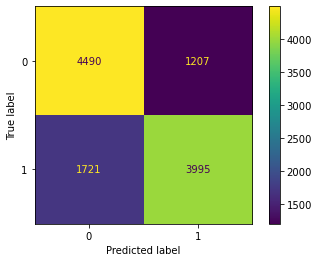

In [76]:
#Comparing the training data confusion matrix with the 
plot_confusion_matrix(gs_best_tree_LoL_model, X_train, y_train);

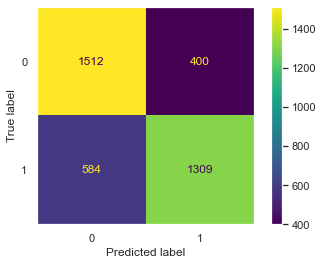

In [138]:
plot_confusion_matrix(gs_best_tree_LoL_model, X_test, y_test)
plt.savefig('images/test_cm.png')
plt.grid(False);

''

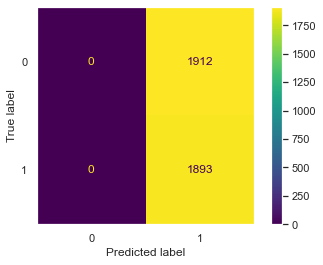

In [123]:
plot_confusion_matrix(dummy_LoL_model, X_test, y_test)
plt.grid(False)
;

In [124]:
dummy_LoL_model.score(X_test,y_test)

0.49750328515111697

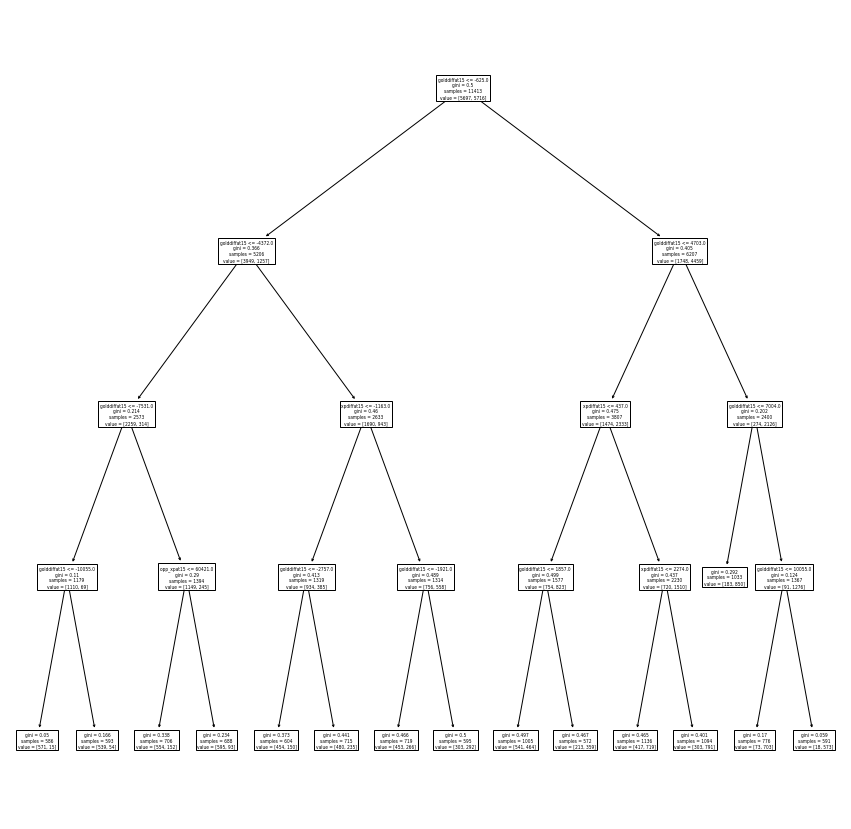

In [78]:
# Visualizing the decision tree
fig,ax = plt.subplots(figsize=(15,15))
plot_tree(gs_best_tree_LoL_model, feature_names=X_train.columns,ax=ax);

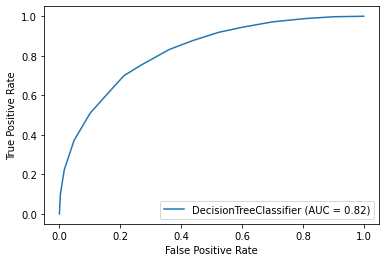

In [79]:
# Identical AUC score
plot_roc_curve(gs_best_tree_LoL_model, X_train, y_train);

In [88]:
# Seeing the importance of each feature
for fi, feauture in zip(gs_best_tree_LoL_model.feature_importances_, X_train.columns):
    print(fi, feauture)

feature_importance = pd.DataFrame(data =gs_best_tree_LoL_model.feature_importances_,
                                 index=X_train.columns)
feature_importance = feature_importance.reset_index()
feature_importance = feature_importance.sort_values(by=[0],ascending=False)
feature_importance

0.0 goldat15
0.0 xpat15
0.0 csat15
0.0 opp_goldat15
0.0024788073461808626 opp_xpat15
0.0 opp_csat15
0.954974468248026 golddiffat15
0.04254672440579326 xpdiffat15
0.0 csdiffat15
0.0 killsat15
0.0 assistsat15
0.0 deathsat15
0.0 opp_killsat15
0.0 opp_assistsat15
0.0 opp_deathsat15


index         0
6      golddiffat15  0.954974
7        xpdiffat15  0.042547
4        opp_xpat15  0.002479
0          goldat15  0.000000
1            xpat15  0.000000
2            csat15  0.000000
3      opp_goldat15  0.000000
5        opp_csat15  0.000000
8        csdiffat15  0.000000
9         killsat15  0.000000
10      assistsat15  0.000000
11       deathsat15  0.000000
12    opp_killsat15  0.000000
13  opp_assistsat15  0.000000
14   opp_deathsat15  0.000000

In [92]:
# setting the theme and palette for all plots made in this notebook
sns.set_theme()
sns.set_palette('colorblind')

<ipython-input-135-8b9a4473c7b4>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=feature_importance['index'],rotation=45,ha='right')


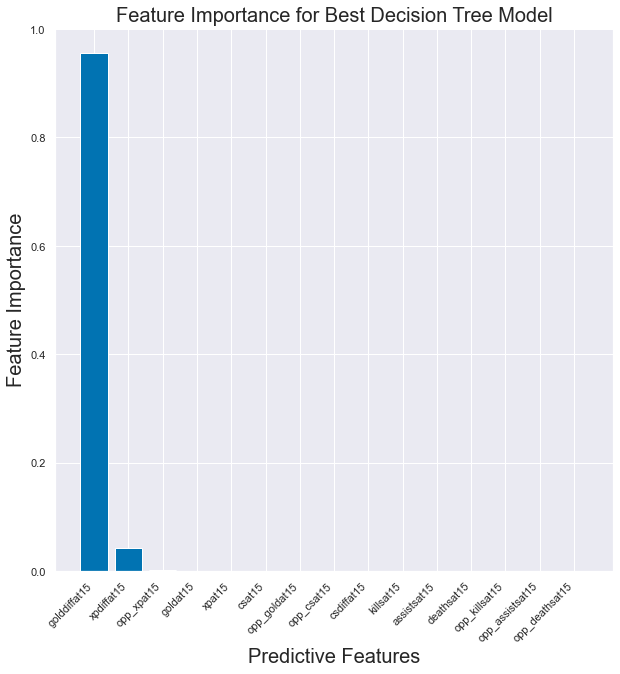

In [135]:
# Creating a visual to show the importance of each feature.
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(x=feature_importance['index'],height=feature_importance[0])

ax.set_title("Feature Importance for Best Decision Tree Model", fontsize=20)
ax.set_xlabel("Predictive Features",fontsize=20)
ax.set_ylabel("Feature Importance",fontsize=20)
ax.set_xticklabels(labels=feature_importance['index'],rotation=45,ha='right')

plt.savefig('images/features.png');

In [90]:
mean_data_for_viz = cleaned_games_at_15_df.groupby('result').mean().reset_index()
mean_data_for_viz = mean_data_for_viz[['result','opp_xpat15','golddiffat15','xpdiffat15']]
mean_data_for_viz

result    opp_xpat15  golddiffat15   xpdiffat15
0       0  59909.369694  -3357.812065 -2027.176764
1       1  57882.192929   3357.812065  2027.176764

In [399]:
mean_data_for_viz.columns[1]

'opp_xpat15'

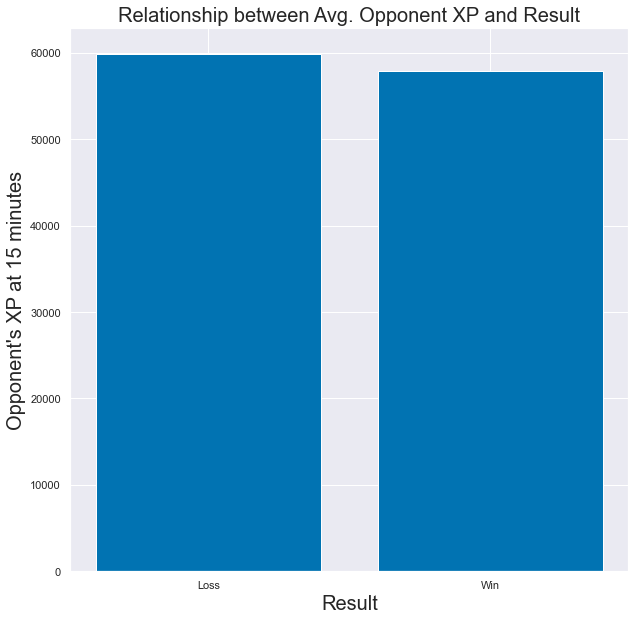

In [129]:
fig, ax = plt.subplots(figsize= (10,10))

ax.bar(x = mean_data_for_viz['result'], height=mean_data_for_viz['opp_xpat15'], tick_label = ['Loss','Win'])
ax.set_ylabel("Opponent's XP at 15 minutes", fontsize=20)
ax.set_xlabel("Result", fontsize=20)
ax.set_title("Relationship between Avg. Opponent XP and Result", fontsize=20)
plt.savefig('images/oppxp.png');

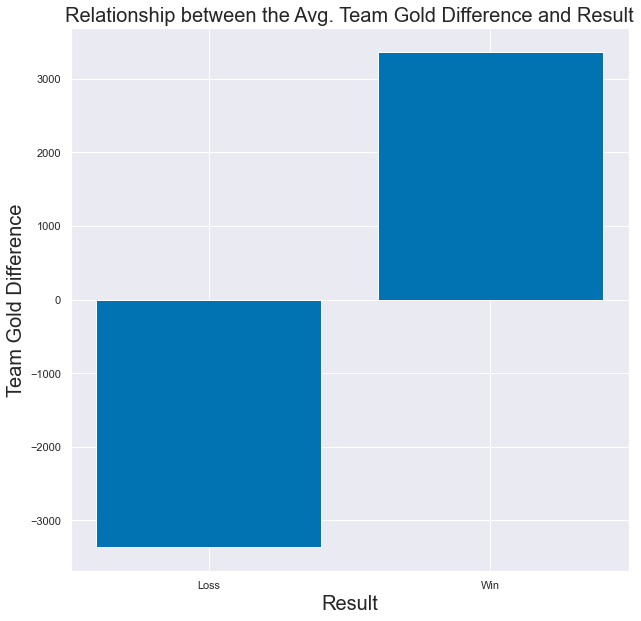

In [130]:
fig, ax = plt.subplots(figsize= (10,10))

ax.bar(x = mean_data_for_viz['result'], height=mean_data_for_viz['golddiffat15'], tick_label = ['Loss','Win'])
ax.set_ylabel("Team Gold Difference", fontsize=20)
ax.set_xlabel("Result", fontsize=20)
ax.set_title("Relationship between the Avg. Team Gold Difference and Result", fontsize=20)
plt.savefig('images/golddiff.png');

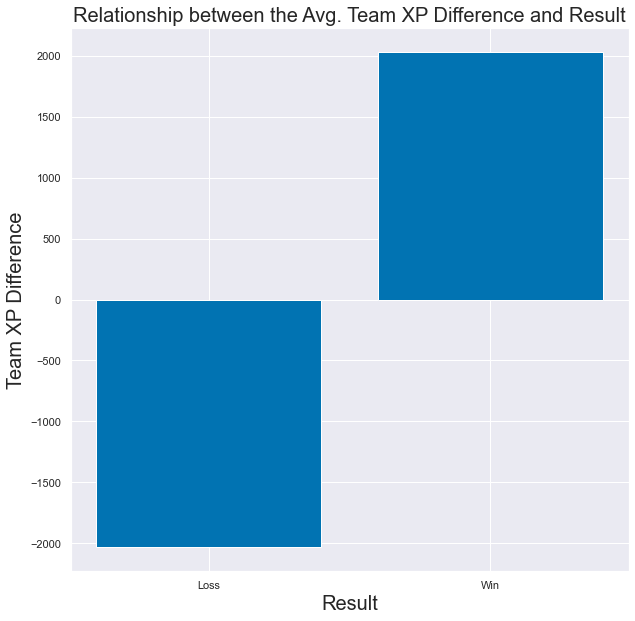

In [131]:
fig, ax = plt.subplots(figsize= (10,10))

ax.bar(x = mean_data_for_viz['result'], height=mean_data_for_viz['xpdiffat15'], tick_label = ['Loss','Win'])
ax.set_ylabel("Team XP Difference", fontsize=20)
ax.set_xlabel("Result", fontsize=20)
ax.set_title("Relationship between the Avg. Team XP Difference and Result", fontsize=20)
plt.savefig('images/xpdiff.png');